<a href="https://colab.research.google.com/github/daJarae/DataScience/blob/main/R_IDS1_4_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Data Science

Ch2 ~ Ch4

전체 내용은 "Introduction to Data Science"의 커리큘럼을 따르며, 기초적인 일부는 생략합니다.

R 복습용으로 만든 포켓몬 종족값 데이터를 불러옵니다.

복습 코드를 학습하기 전에 도감 번호를 통해 '세대' 컬럼을 추가합니다. (9세대인 팔데아는 없음)

In [2]:
pkm=read.csv('/content/pkm_many_nan.csv')

포켓몬 지방도감 001번은 풀타입 스타팅 포켓몬입니다.

In [56]:
print(c(pkm$이름[1],pkm$번호[1])) #1 관동 시작번호
print(c(pkm$이름[208],pkm$번호[208]))  #2 성도
print(c(pkm$이름[318],pkm$번호[318])) #3 호연
print(c(pkm$이름[482],pkm$번호[482])) #4 신오
print(c(pkm$이름[601],pkm$번호[601])) #5 하나, 예외적으로 배포 포켓몬 비크티니는 하나도감 000번
print(c(pkm$이름[777],pkm$번호[777])) #6 칼로스 (XY)
print(c(pkm$이름[858],pkm$번호[858])) #7 알로라 (썬문)
print(c(pkm$이름[950],pkm$번호[950])) #8 가라르 (소드실드)

[1] "이상해씨" "001"     
[1] "치코리타" "152"     
[1] "나무지기" "252"     
[1] "모부기" "387"   
[1] "비크티니" "494"     
[1] "도치마론" "650"     
[1] "나몰빼미" "722"     
[1] "흥나숭" "810"   


In [57]:
length(pkm$이름)

[1] 1045

In [59]:
세대=c(rep("1",207),rep("2",110),rep("3",482-318),rep("4",601-482),rep("5",777-601),rep("6",858-777),rep("7",950-858),rep("8",1045-950+1)) #마지막 번호는 동일지역이므로 +1
pkm$세대=세대 #길이가 다르면 error
head(pkm)

,X,번호,이름,체력,공격,방어,특공,특방,스피드,기타,⋯,벌레,불꽃,비행,악,얼음,에스퍼,전기,페어리,풀,세대
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0,001,이상해씨,45,49,49,65,65,45,,⋯,0,0,0,0,0,0,0,0,0,1
2,1,002,이상해풀,60,62,63,80,80,60,,⋯,0,0,0,0,0,0,0,0,0,1
3,2,003,이상해꽃,80,82,83,100,100,80,,⋯,0,0,0,0,0,0,0,0,1,1
4,3,003m,메가이상해꽃,80,100,123,122,120,80,,⋯,0,0,0,0,0,0,0,0,0,1
5,4,004,파이리,39,52,43,60,50,65,,⋯,0,0,0,0,0,0,0,0,0,1
6,5,005,리자드,58,64,58,80,65,80,,⋯,0,0,0,0,0,0,0,0,0,1




---



chapter 1 (Getting started with R and RStudio) : 생략

#Ch2: R Basic

In [15]:
#자주 잊는 기초

print(Inf+1) #Inf는 무한
print(seq(1,10,2)) #seq는 수열 생성
print(exp(log(10, base=2)))

[1] Inf
[1] 1 3 5 7 9
[1] 27.71373


자료형태

In [35]:
#matrix

mat=matrix(1:12,4,3,byrow=T) #행,열 #byrow=T 없으면 1열이 1,2,3,4
mat[,1] #1열

[1]  1  4  7 10

In [40]:
#list

이상해씨=list(name = "이상해씨",
            id = 1,
             value = c(45, 49, 65, 65)) #이름 호출 없이하면 자동 정수 인덱스 부여

print(이상해씨)

$name
[1] "이상해씨"

$id
[1] 1

$value
[1] 45 49 65 65



In [63]:
#vector

a=c(1,2,3)
v=c('1'=2,'3'=4) #이름 할당
print(names(v)) #또는 d.f 컬럼명 알려줌
cat("\n")       #cat은 여러 줄의 출력문에 유용

a=as.character(a)
print(a)
a=as.numeric(a)
print(a)

[1] "1" "3"

[1] "1" "2" "3"
[1] 1 2 3


In [23]:
이상해씨[["value"]] #list내 요소 접근시 double square brackets 사용

[1] 45 49 65 65

데이터프레임 (d.f) 탐색

In [79]:
#d.f 선언

temp <- c(35, 88, 42)
city <- c("Beijing", "Lagos", "Paris")
city_temps <- data.frame(name = city, temperature = temp)

city_temps

name,temperature
<chr>,<dbl>
Beijing,35
Lagos,88
Paris,42


In [16]:
str(pkm) #d.f의 structure

'data.frame':	1045 obs. of  29 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ 번호  : chr  "001" "002" "003" "003m" ...
 $ 이름  : chr  "이상해씨" "이상해풀" "이상해꽃" "메가이상해꽃" ...
 $ 체력  : int  45 60 80 80 39 58 78 78 78 44 ...
 $ 공격  : int  49 62 82 100 52 64 84 130 104 48 ...
 $ 방어  : int  49 63 83 123 43 58 78 111 78 65 ...
 $ 특공  : int  65 80 100 122 60 80 109 130 159 50 ...
 $ 특방  : int  65 80 100 120 50 65 85 85 115 64 ...
 $ 스피드: int  45 60 80 80 65 80 100 100 100 43 ...
 $ 기타  : chr  "" "" "" "" ...
 $ 강철  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 격투  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 고스트: num  0 0 0 0 0 0 0 0 0 0 ...
 $ 노말  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 독    : num  0 0 1 0 0 0 0 0 0 0 ...
 $ 드래곤: num  0 0 0 0 0 0 0 0 0 0 ...
 $ 땅    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 물    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 바위  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 벌레  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 불꽃  : num  0 0 0 0 0 0 1 0 0 0 ...
 $ 비행  : num  0 0 0 0 0 0 1 0 0 0 ...
 $ 악    : num  0 0 0 0 0 0 0 0 0 0 ..

In [17]:
names(pkm) #py: columns()

[1] "X"      "번호"   "이름"   "체력"   "공격"   "방어"   "특공"   "특방"  
 [9] "스피드" "기타"   "강철"   "격투"   "고스트" "노말"   "독"     "드래곤"
[17] "땅"     "물"     "바위"   "벌레"   "불꽃"   "비행"   "악"     "얼음"  
[25] "에스퍼" "전기"   "페어리" "풀"     "세대"

주요 함수

levels, reorder, which.max, rank, with

In [18]:
levels(pkm$세대) #factor가 아닌 character이므로 NULL

NULL

In [19]:
levels(factor(세대)) #alphabetical order default.

[1] "1" "2" "3" "4" "5" "6" "7" "8"

In [20]:
levels(reorder(pkm$세대,pkm$공격,FUN=sum)) #"세대의 factor 순서"를 '세대별 공격 sum' 기준으로 정렬

[1] "6" "2" "8" "7" "4" "3" "5" "1"

이후 글자가 깨질 우려가 있어 열 이름을 변경합니다

In [87]:
colnames(pkm)=c('n','id','name','H','P','D','TP','TD','S','tmi','steel','fighting','ghost','normal','poison','dragon','ground','water','rock','bug','fire','flying','dark','ice','psychic','electric','fairy','grass','gen')

In [102]:
#which.max

i=which.max(pkm$P)
print(pkm$name[i]) #공격이 가장 높은 포켓몬
cat(pkm$P[i])

#which.min

i=which.min(pkm$P)
print(pkm$name[i]) #공격이 가장 낮은 포켓몬
cat(pkm$P[i])

[1] "메가뮤츠X"
190[1] "럭키"
5

In [104]:
#rank #작은 것부터 1등

print(pkm$name[c(3,7,12)])
print(rank(pkm$P[c(3,7,12)])) #공격력은 이상해꽃<거북왕<리자몽

[1] "이상해꽃" "리자몽"   "거북왕"  
[1] 1 3 2


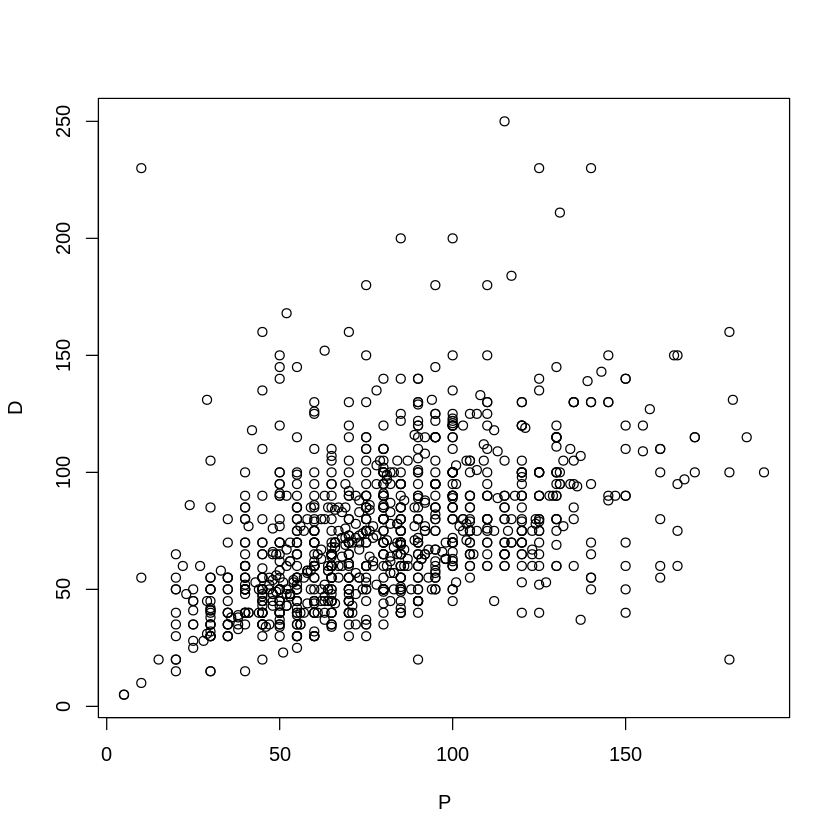

In [103]:
with(pkm, plot(P,D)) #이후 호출되는 모든 변수가 pkm$~

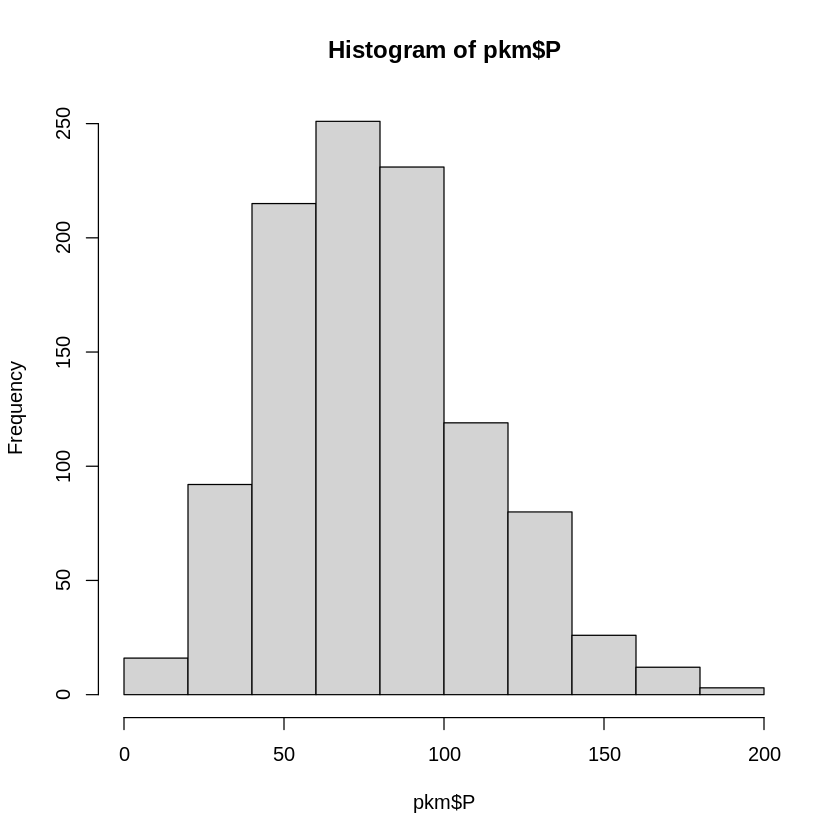

In [89]:
hist(pkm$P) #right skewed.



---



#주요 라이브러리

In [24]:
#install.packages('tidyverse') #최초 1회만 실행.
#dplyr, ggplot2 등 'tidy'한 data에 쓸 수 있는 여러 패키지 포함

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [156]:
library(tidyverse)

#tidy한 데이터란 각 행이 여러 변수의 값들로 묶인 하나의 관측 대상일 경우. (행 안 요소간 연결성.)
#이때 tidyverse 함수를 거치면 결과물은 data.frame이 아닌 tibble로 출력된다

class(as_tibble(pkm)) #'tbl_df''tbl''data.frame' 로 뜨는 것이 정상

[1] "tbl_df"     "tbl"        "data.frame"

tibble은 data.frame보다 유연하기 때문에 mean, sd 같은 함수도 값처럼 저장할 수 있다.

#Ch3: Programming basics

In [105]:
#if&else, ifelse

a=0

if(a!=0){
  print(1/a)
  } else{         #else가 }와 한 줄에 와야함
  print("No!")}


ifelse(a > 0, 1/a, NA)

[1] "No!"


[1] NA

In [106]:
identical(1,"1")

[1] FALSE

In [112]:
print(all(c(1,1,1))) #1의 type이 logical이어서 warning

print(any(!c(1,1,0)))

Warning message in all(c(1, 1, 1)):
“coercing argument of type 'double' to logical”


[1] TRUE
[1] TRUE




---



#Ch4: The tidyverse

mutate, filter, select

In [143]:
#select 열 선택, filter 열 관련 조건식으로 행 선택
#arrange 매칭되는 각 인덱스에 오도록 행 정렬, mutate 새 변수(열) 생성

#공격력이 하위 100등인 포켓몬들
low_P=pkm|>
  mutate(total=H+P+D+TP+TD+S)|>
  select(name, P,TP,S,gen, total)|>
  filter(rank(P)<=100)|>
  arrange(rank(P))            #내림차순은 arrange(desc(변수))

low_P|>head()

#pipe: |> 대신 %>%도 가능
#muate내 변수 이름은 'total'같은 따옴표 불필요

,name,P,TP,S,gen,total
,<chr>,<int>,<int>,<int>,<chr>,<int>
1,럭키,5,35,50,1,450
2,핑복,5,15,30,4,220
3,잉어킹,10,15,80,1,200
4,단단지,10,10,5,2,505
5,해피너스,10,75,55,2,540
6,빈티나,15,10,80,3,200


In [146]:
#summarize: 지정 행(들)을 통해 산출되는 단일 값 제시
#groub_by와 사용시 특히 유용

pkm=pkm|>mutate(total=H+P+D+TP+TD+S)

pkm|>group_by(gen)|>summarize(min_total=min(total)) #세대별 '가장 낮은 종족값합'

gen,min_total
<chr>,<int>
1,195
2,180
3,190
4,194
5,255
6,200
7,175
8,180


전체중 종족값이 가장 낮은 5마리는 누굴까요?

In [151]:
pkm|>arrange(rank(total))|>select(id,name,total,gen)|>head(5) #꼴찌를 면하기 위한 도토리 키재기...

,id,name,total,gen
,<chr>,<chr>,<int>,<chr>
1,746,약어리,175,7
2,191,해너츠,180,2
3,824,두루지벌레,180,8
4,872,누니머기,185,8
5,298,루리리,190,3


In [154]:
#pull을 사용하면 tibble이 아닌 벡터의 형태로 출력, 저장 가능

low_P|>head()|>pull(name)

[1] "럭키"     "핑복"     "잉어킹"   "단단지"   "해피너스" "빈티나"

In [182]:
#종족값이 600 이상인 드래곤 포켓몬은? (타입은 관심 대상이 최종진화형일 때만 사용 가능)

mask=sapply(pkm$total, function(x){ifelse(x>=600,T,F)}) #종족값이 600 이상인 포켓몬이면 T
strong_dragon=pkm[mask,]|>filter(dragon==1&tmi=='')|>select(name,total,gen)

#드래곤 타입이면서 기본형인 포켓몬의 이름, 종족값합

head(strong_dragon)

,name,total,gen
,<chr>,<int>,<chr>
1,망나뇽,600,1
2,보만다,600,3
3,라티아스,600,3
4,라티오스,600,3
5,레쿠쟈,680,3
6,한카리아스,600,4


purrr function

sapply: 벡터 출력

map: 리스트 출력

map_dlb: numeric vector 출력 (character로 변환 등 X)

map_df: tibble 출력 (data.frame 아님)

In [158]:
sapply(1:5, function(x){y=1:x;sum(y)}) #sapply(벡터요소(또는 열), 함수)

[1]  1  3  6 10 15

In [180]:
comp=function(n){
  x=1:n               #tibble 형태 출력시
  tibble(sum=sum(x))} # 'sum' 이라는 열 이름 지정이 필수임

map_df(n, comp)

sum
<int>
1
3
6
10
15


In [191]:
#case_when: if, else의 반복을 줄여줌
sdt=strong_dragon$total
how_strong=case_when(sdt<=650 ~ "strong",
          sdt<=700 ~ "stronger",
          TRUE ~ "strongest!") #TRUE for else

#between(x,a,b): x가 a이상 b이하면 TRUE (아래처럼 filter와 같이 사용)
strong_dragon|>mutate(how_strong=how_strong)|>filter(between(total,650,800))|>head(5)

,name,total,gen,how_strong
,<chr>,<int>,<chr>,<chr>
1,레쿠쟈,680,3,stronger
2,디아루가,680,4,stronger
3,펄기아,680,4,stronger
4,아르세우스,720,4,strongest!
5,레시라무,680,5,stronger




---

